# Generate Book Word Count Histogram
Runs a pipeline that generate a PDF histogram from a raw book text.

## Purpose
Illustrate how src layout is benefical for:
- **Reuse:** same function everywhere, no copy-paste.
- **Clarity:** separation of “what” (script orchestrates) vs “how” (module implements).
- **Testing:** functions in src/ can be tested in isolation with pytest. (Future GECS sessions)

## Methodology
1. Clean a book's raw text 
2. Count words in the cleaned text
3. Plot the word count histogram of the first most abudant words
   
## WIP - improvements

- `.splitlines()` needs to be done upon loading or explicitly in another function;

## Results
The pipeline run successfully and more managably wiht all functions living in the `src` module.

## Suggested next steps
The Project Gutneberg book can become a class with mehtods currently used as functions.

# Setup

## Library import

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Local library import

In [15]:
# Include local library paths
import sys
sys.path.append('src') # uncomment and fill to import local libraries

# Import local libraries
from src.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, ANALYZED_DIR, RESULT_DIR
from src.dataset import load_text, strip_headers
from src.analysis import main as save_word_counts, calculate_word_counts, word_count
from src.plots import plot_word_counts

# Parameter definition

In [17]:
RAW_BOOK_TEXT_PATH = RAW_DATA_DIR / "book.txt"

# Data import

In [ ]:
raw_book_text = load_text(RAW_BOOK_TEXT_PATH)
raw_book_text[:10]  # Display the first 10 lines of the raw text

['The Project Gutenberg eBook of The Odyssey',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 '']

# Data processing

In [13]:
cleaned_book_text = strip_headers(raw_book_text).splitlines()
cleaned_book_text[:10]  # Display the first 500 lines of the cleaned text

['[Illustration]',
 '',
 '',
 '',
 '',
 'The Odyssey',
 '',
 'by Homer',
 '',
 'rendered into English prose for the use of those who cannot read the']

## Analysis

In [19]:
word_count_df = calculate_word_counts(cleaned_book_text)
word_count_df.head() # Display the first few rows of the word count DataFrame

,word,count
0,the,6829
1,and,5266
2,of,3515
3,to,3515
4,a,1979


## Plotting

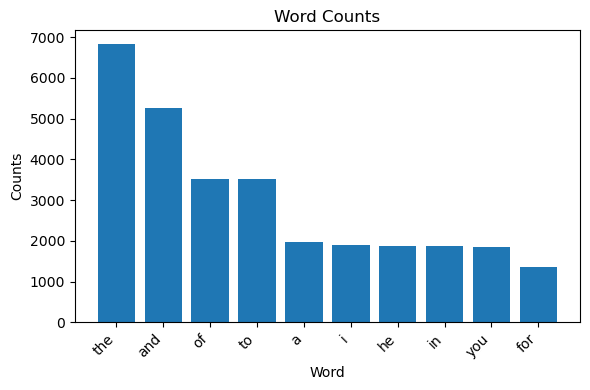

In [16]:
plot_word_counts(word_count_df)

# References
1. [Cookiecutter Data Science project by DrivenData](https://cookiecutter-data-science.drivendata.org) (acessed on 2025 Aug 20)
2. [The Project Gutenberg](https://www.gutenberg.org/)